In [1]:
# only adjust settings in this cell
state = 'NC'
root_name = 'Mecklenburg' # which county will root our district (or county_cluster==multi-district)?
k = 14                    # the state has this number of districts
deviation = 1             # use: L=ideal_population-deviation, U=ideal_population-deviation
size = 3                  # size=1 for single district, size=2 for double district, ...
obj_type = 'inverse_polsby_popper'# compactness objectives: cut_edges, perimeter, or polsby_popper

In [2]:
filepath = '..\\dat\\'
filename = state + '_county.json'

from util import read_graph_from_json
G = read_graph_from_json( filepath + filename) 

In [3]:
G._k = k
G._size = size

print("State has total of k =",G._k,"districts")
print("We seek a county cluster of size =",G._size)

State has total of k = 14 districts
We seek a county cluster of size = 3


In [4]:
ideal_population = sum( G.nodes[i]['TOTPOP'] for i in G.nodes ) / G._k

# Calculate lower and upper population limits
from math import ceil, floor
G._L = ceil( ideal_population - deviation )
G._U = floor( ideal_population + deviation )

print("Single district lower population limit L =",G._L)
print("Single district upper population limit U =",G._U)

Single district lower population limit L = 745670
Single district upper population limit U = 745671


In [5]:
# Require this county be in our district/county_cluster/multi_district
G._root = G._root = [ i for i in G.nodes if G.nodes[i]['NAME20'] == root_name ][0]
print("Use",root_name,"County to be the root. In our graph, this is vertex #",G._root)

Use Mecklenburg County to be the root. In our graph, this is vertex # 32


In [6]:
from optimization import enumerate_top_districts
districts = enumerate_top_districts( G, obj_type=obj_type, enumeration_limit=10 )

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-19
Set parameter LazyConstraints to value 1
Set parameter IntFeasTol to value 1e-07
Set parameter FeasibilityTol to value 1e-07
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Xeon(R) CPU E5-2630 v4 @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 20 logical processors, using up to 20 threads

Optimize a model with 793 rows, 935 columns and 4109 nonzeros
Model fingerprint: 0xec116729
Model has 1 quadratic constraint
Variable types: 491 continuous, 444 integer (444 binary)
Coefficient statistics:
  Matrix range     [7e-04, 1e+06]
  QMatrix range    [1e+00, 1e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+06]
Presolve removed 116 rows and 119 columns
Presolve time: 0.01s
Presolved: 677 rows, 816 columns, 3610 nonzeros
Presolved model has 1 quadratic constraint(s)
Va

 1142859 320291 infeasible   57               -    4.68663      -  30.4  350s
 1152777 322846    7.07278   54  121          -    4.70054      -  30.4  355s
 1163431 325038 infeasible   70               -    4.71384      -  30.4  360s
 1173962 327638    6.11040   58   35          -    4.72648      -  30.4  365s
 1186053 329772    7.54276   66    6          -    4.74446      -  30.4  370s
 1195960 331817    5.51858   55   49          -    4.75782      -  30.4  375s
 1207855 334602    5.56856   61    6          -    4.77416      -  30.4  381s
 1217264 336534    9.21912   68   28          -    4.78672      -  30.4  385s
 1225325 338547    6.58175   57   56          -    4.80084      -  30.4  390s
 1236890 340500    6.37663   54   64          -    4.81549      -  30.3  395s
 1244971 342542    5.97804   57   55          -    4.82893      -  30.3  400s
 1257115 345274    4.90840   52   78          -    4.84376      -  30.3  405s
 1267962 347043 infeasible   60               -    4.85753      

 2024108 483869 infeasible   73               -    5.68306      -  29.9  866s
 2032455 485110   11.00086   60   86          -    5.69043      -  29.9  871s
 2037582 485923    5.89194   48   95          -    5.69509      -  29.9  875s
 2046151 487245    6.00192   55   43          -    5.70276      -  29.9  880s
 2052823 488467    9.62631   57   77          -    5.70987      -  29.9  885s
 2061170 489397 infeasible   50               -    5.71683      -  29.9  891s
 2066500 490320 infeasible   66               -    5.72208      -  29.9  895s
 2074593 491726    7.21843   55   26          -    5.72872      -  29.9  900s
 2081276 493068    8.88563   55   60          -    5.73574      -  29.9  906s
 2088413 493673 infeasible   54               -    5.74251      -  29.9  910s
 2095192 494931   11.57328   54   53          -    5.74920      -  29.9  915s
 2100411 495630 infeasible   55               -    5.75482      -  29.9  920s
 2108849 496655 infeasible   53               -    5.76324      

 2752128 580607    7.91663   54   89          -    6.31969      -  29.6 1386s
 2757890 581743    8.45091   50  115          -    6.32436      -  29.6 1390s
 2766557 582535    8.62623   53   92          -    6.33022      -  29.6 1396s
 2771537 583062 infeasible   52               -    6.33528      -  29.6 1400s
 2777091 584087 infeasible   62               -    6.33950      -  29.6 1405s
 2785455 584749 infeasible   53               -    6.34555      -  29.6 1410s
 2791822 586076    6.67255   62   27          -    6.35027      -  29.6 1415s
 2799375 586695 infeasible   57               -    6.35602      -  29.6 1420s
 2806363 587853   11.35349   57   82          -    6.36212      -  29.6 1426s
 2811665 588481    7.94348   67   27          -    6.36613      -  29.6 1430s
 2819954 589013    8.77237   72   65          -    6.37310      -  29.6 1436s
 2825780 590022 infeasible   58               -    6.37744      -  29.6 1440s
 2831408 590772 infeasible   57               -    6.38173      

found [7, 9, 20, 32, 34, 37, 46, 50, 52, 59, 87, 88, 97] with objective = 10.49768707693624
   ^added to list!
 3408167 648891 infeasible   52               -    6.82150      -  29.4 1900s
 3414798 649843    9.84121   63   90          -    6.82698      -  29.4 1906s
 3420081 650302 infeasible   61               -    6.83092      -  29.4 1910s
 3425293 650935   14.69437   60   86          -    6.83506      -  29.4 1915s
 3430907 651404    9.29227   59   11          -    6.83892      -  29.4 1920s
 3438646 652000    8.93594   61    6          -    6.84352      -  29.4 1925s
 3445052 652945   10.93099   55   80          -    6.84897      -  29.4 1931s
 3450303 653598    8.64140   59   79          -    6.85229      -  29.4 1936s
 3457656 654062    8.45453   67   13          -    6.85717      -  29.4 1941s
 3463350 654559    8.67335   53   36          -    6.86140      -  29.4 1945s
 3468561 655161 infeasible   59               -    6.86482      -  29.4 1950s
 3474430 656356    8.24203   68

 4015677 708095 infeasible   68               -    7.23507      -  29.2 2420s
 4021211 708817 infeasible   66               -    7.23771      -  29.2 2425s
 4026628 709657    7.32207   55   34          -    7.24149      -  29.2 2430s
 4031882 710063 infeasible   58               -    7.24445      -  29.2 2435s
 4037847 710462    7.77145   57   22          -    7.24877      -  29.2 2441s
 4042375 710965    8.13169   56   59          -    7.25186      -  29.2 2445s
 4049370 711418   10.16697   63   12          -    7.25597      -  29.1 2450s
 4054737 711786 infeasible   69               -    7.25897      -  29.1 2455s
 4060141 712247    9.06188   51   74          -    7.26258      -  29.1 2461s
 4065940 713103    9.45788   59   55          -    7.26652      -  29.1 2466s
 4069873 713190 infeasible   60               -    7.26864      -  29.1 2470s
 4075500 714248    9.30338   51  124          -    7.27211      -  29.1 2475s
 4080911 714854 infeasible   65               -    7.27521      

 4565240 762923 infeasible   46               -    7.56179      -  28.9 2941s
 4570799 763284   10.51167   57  142          -    7.56537      -  28.9 2946s
 4574975 763765 infeasible   55               -    7.56774      -  28.9 2950s
 4580482 764286   12.53387   52  131          -    7.57058      -  28.9 2956s
 4586364 765045    7.84286   62  109          -    7.57383      -  28.9 2961s
 4590673 765469 infeasible   50               -    7.57600      -  28.8 2965s
 4596132 766341 infeasible   59               -    7.57971      -  28.8 2971s
 4600801 767013    8.24375   68    6          -    7.58170      -  28.8 2975s
 4606533 767655 infeasible   69               -    7.58529      -  28.8 2981s
 4610834 768254 infeasible   59               -    7.58742      -  28.8 2985s
 4616054 768609    9.41603   71   20          -    7.59042      -  28.8 2991s
 4618661 769037 infeasible   59               -    7.59269      -  28.8 2995s
 4626251 769583 infeasible   53               -    7.59630      

 5053215 810580    9.95557   54  110          -    7.82979      -  28.6 3430s
 5057942 811346    9.81481   55   92          -    7.83253      -  28.6 3436s
 5062059 811309   10.17611   60   71          -    7.83464      -  28.6 3440s
 5067591 812179 infeasible   56               -    7.83791      -  28.6 3446s
 5074621 812665   11.15696   78    6          -    7.84088      -  28.5 3451s
 5078641 813004   10.24247   60   46          -    7.84276      -  28.5 3455s
 5083767 814037    8.59677   61   93          -    7.84530      -  28.5 3461s
 5087695 814460    8.01360   67   12          -    7.84746      -  28.5 3465s
 5094395 814828 infeasible   59               -    7.85051      -  28.5 3471s
 5099423 815294    9.00529   51   74          -    7.85331      -  28.5 3476s
found [1, 3, 11, 16, 24, 26, 28, 31, 32, 41, 42, 69, 72, 83, 88, 94, 98, 99] with objective = 12.668019544406864
   replaced worse solution with objective = 13.22091708270051
adding cut saying that objective should be le

 5559279 860144 infeasible   55               -    8.08412      -  28.1 3940s
 5564816 860962    8.25027   50  158          -    8.08674      -  28.1 3946s
 5568934 861319   11.97204   74    4          -    8.08910      -  28.1 3950s
 5572812 861624 infeasible   67               -    8.09109      -  28.1 3955s
 5579863 862028   10.30405   72   23          -    8.09436      -  28.1 3960s
 5584876 862726    9.00856   60   21          -    8.09733      -  28.1 3967s
 5588534 863090    8.16189   63   47          -    8.09903      -  28.1 3971s
 5592645 863417 infeasible   53               -    8.10087      -  28.1 3975s
 5599578 863737 infeasible   63               -    8.10433      -  28.1 3981s
 5601941 864355   12.82006   76   19          -    8.10603      -  28.1 3985s
 5606248 864844   11.51713   61   68          -    8.10824      -  28.1 3990s
 5613352 865243 infeasible   72               -    8.11151      -  28.1 3996s
 5617622 865664    9.56485   59   85          -    8.11326      

 6010564 895265 infeasible   65               -    8.30705      -  27.7 4436s
 6014725 895560 infeasible   64               -    8.30897      -  27.7 4441s
 6018822 895872 infeasible   69               -    8.31097      -  27.7 4446s
 6022918 896221 infeasible   68               -    8.31313      -  27.7 4450s
 6026908 896528 infeasible   84               -    8.31498      -  27.7 4455s
 6031892 897209 infeasible   88               -    8.31731      -  27.7 4461s
 6036110 897558    9.91552   65   48          -    8.31929      -  27.7 4466s
 6040131 897904    9.57691   72    5          -    8.32156      -  27.7 4470s
 6044420 898147   10.69398   60   56          -    8.32363      -  27.7 4475s
 6048277 898430   11.06105   70   80          -    8.32545      -  27.7 4480s
 6055049 898659 infeasible   91               -    8.32871      -  27.7 4486s
 6059039 898829 infeasible   71               -    8.33063      -  27.7 4491s
 6063281 899043 infeasible   71               -    8.33251      

 6470891 928039    9.42988   63   49          -    8.52397      -  27.3 4966s
 6474863 928284 infeasible   58               -    8.52589      -  27.3 4971s
 6478956 928554    9.55855   59   47          -    8.52801      -  27.3 4976s
 6483349 928832   10.34354   62   36          -    8.53002      -  27.3 4980s
 6487258 929154 infeasible   62               -    8.53172      -  27.3 4985s
 6491213 929274 infeasible   61               -    8.53358      -  27.3 4990s
 6495495 929604   10.04863   60   57          -    8.53575      -  27.3 4995s
 6499314 929721 infeasible   56               -    8.53731      -  27.3 5000s
 6504292 930133   10.62138   55   11          -    8.54000      -  27.3 5007s
 6508229 930339    9.81889   63   11          -    8.54173      -  27.3 5011s
 6512330 930566   10.65110   61  117          -    8.54334      -  27.3 5017s
 6516476 931076   11.33943   64  123          -    8.54548      -  27.2 5022s
 6520546 931472    9.71947   68   35          -    8.54749      

 6909621 953478   10.22478   87    5          -    8.72622      -  26.9 5497s
 6912696 953411 infeasible   61               -    8.72743      -  26.9 5500s
 6916767 953620 infeasible   70               -    8.72922      -  26.9 5505s
 6920853 953768 infeasible   66               -    8.73103      -  26.9 5510s
 6925542 953974 infeasible   66               -    8.73318      -  26.9 5515s
 6929660 954169    9.36867   65   17          -    8.73535      -  26.9 5520s
 6933405 954326 infeasible   60               -    8.73720      -  26.9 5525s
 6937569 954440 infeasible   64               -    8.73895      -  26.9 5530s
 6942796 955171   11.59527   58   67          -    8.74150      -  26.9 5537s
 6947023 955380   10.52754   70   11          -    8.74348      -  26.9 5542s
 6951140 955712   10.27752   78   14          -    8.74538      -  26.8 5547s
 6955308 955804   11.35588   71    7          -    8.74727      -  26.8 5551s
 6959218 955828 infeasible   64               -    8.74876      

 7309419 971148    8.96277   77   10          -    8.90983      -  26.5 5996s
 7313560 971151   10.89186   57   40          -    8.91198      -  26.5 6001s
 7317496 971410    9.29774   66   41          -    8.91410      -  26.5 6006s
 7321735 971433   10.51767   61   89          -    8.91600      -  26.5 6013s
 7324618 971293 infeasible   58               -    8.91731      -  26.5 6015s
 7328638 971380   10.92215   80   23          -    8.91945      -  26.5 6020s
 7332929 971772   10.55147   57  117          -    8.92170      -  26.5 6027s
 7336884 971713    9.43095   62   39          -    8.92382      -  26.5 6032s
 7340674 971596   10.09868   68    5          -    8.92531      -  26.5 6038s
 7343599 971455   10.72842   67    4          -    8.92705      -  26.5 6041s
 7347563 971499 infeasible   70               -    8.92921      -  26.5 6046s
 7351682 971518 infeasible   62               -    8.93115      -  26.5 6052s
 7352785 971575   10.54455   57   97          -    8.93189      

 7685998 969974   10.87759   61   12          -    8.95765      -  26.2 6511s
 7689820 969930 infeasible   60               -    8.95765      -  26.2 6516s
 7693595 969743    9.33786   55   77          -    8.95765      -  26.2 6521s
 7694735 969662 infeasible   56               -    8.95765      -  26.2 6525s
 7698653 969523    9.37008   53   89          -    8.95765      -  26.2 6530s
 7702835 969350 infeasible   62               -    8.95765      -  26.1 6536s
 7706561 969095    9.21923   51  110          -    8.95765      -  26.1 6541s
 7710525 969068    9.96320   55   78          -    8.95765      -  26.1 6546s
 7713395 969093   11.21000   87   13          -    8.95765      -  26.1 6550s
 7717120 968995    9.91265   69   11          -    8.95765      -  26.1 6555s
 7721066 968844   10.17750   73   10          -    8.95765      -  26.1 6560s
 7724893 968765   11.17839   79   17          -    8.95765      -  26.1 6565s
 7728924 968600 infeasible   63               -    8.95765      

 8068352 956995 infeasible   58               -    8.95765      -  25.8 7040s
 8073704 956732 infeasible   72               -    8.95765      -  25.8 7045s
 8077736 956478 infeasible   65               -    8.95765      -  25.8 7051s
 8078963 956505 infeasible   58               -    8.95765      -  25.8 7055s
 8083062 956233 infeasible   75               -    8.95765      -  25.8 7061s
 8087110 956101 infeasible   77               -    8.95765      -  25.8 7067s
 8090030 956038   10.69856   63   42          -    8.95765      -  25.8 7070s
 8093817 955806 infeasible   67               -    8.95765      -  25.8 7075s
 8097570 955758 infeasible   69               -    8.95765      -  25.8 7080s
 8100903 955555   10.47000   55   62          -    8.95765      -  25.8 7086s
 8104835 955270 infeasible   61               -    8.95765      -  25.8 7092s
 8107633 955082    9.70435   63   55          -    8.95765      -  25.7 7095s
 8111711 954855   10.06214   55  138          -    8.95765      

 8447988 932747 infeasible   86               -    8.95765      -  25.4 7571s
 8449573 932612   10.55563   62   44          -    8.95765      -  25.4 7575s
 8453316 932264 infeasible   66               -    8.95765      -  25.4 7580s
 8457418 932077 infeasible   48               -    8.95765      -  25.4 7586s
 8461276 931640 infeasible   57               -    8.95765      -  25.4 7592s
 8465453 931319 infeasible   60               -    8.95765      -  25.4 7597s
 8468404 931164 infeasible   60               -    8.95765      -  25.4 7600s
 8472263 930932 infeasible   66               -    8.95765      -  25.4 7605s
 8475964 930630   11.08442   74   23          -    8.95765      -  25.4 7612s
 8477140 930595 infeasible   54               -    8.95765      -  25.4 7615s
 8481315 930179   10.10560   63   43          -    8.95765      -  25.4 7621s
 8485279 929946   10.11118   75    6          -    8.95765      -  25.4 7626s
 8489294 929711    9.65008   65   48          -    8.95765      

 8785797 878492 infeasible   85               -    8.95765      -  25.0 8065s
 8789889 877636    9.79127   64   22          -    8.95765      -  25.0 8071s
found [3, 10, 12, 13, 22, 24, 26, 28, 32, 45, 50, 61, 69, 72, 83, 88, 94, 98, 99] with objective = 9.740790173760276
   replaced worse solution with objective = 10.751500470271454
adding cut saying that objective should be less than 10.580317466219348
 8794622 876620    9.85263   73   16          -    8.95765      -  25.0 8077s
 8796028 876023   10.14705   75   14          -    8.95765      -  25.0 8081s
 8800154 874996    9.95082   77   30          -    8.95765      -  25.0 8087s
 8802974 874428 infeasible   76               -    8.95765      -  25.0 8090s
 8807151 873255 infeasible   60               -    8.95765      -  25.0 8097s
 8808481 872628 infeasible   58               -    8.95765      -  25.0 8100s
 8812710 871367   10.21692   82   18          -    8.95765      -  25.0 8107s
 8815431 870842 infeasible   66               

 9135572 768396 infeasible   55               -    8.95765      -  24.6 8577s
 9137022 767480   10.48307   53  131          -    8.95765      -  24.6 8581s
 9141214 765832   10.24496   87    8          -    8.95765      -  24.6 8587s
 9145479 764169 infeasible   61               -    8.95765      -  24.6 8594s
 9148201 763418 infeasible   65               -    8.95765      -  24.6 8596s
 9149655 762473 infeasible   73               -    8.95765      -  24.6 8600s
 9153933 760767   10.24385   65    5          -    8.95765      -  24.6 8607s
 9156794 760046 infeasible   59               -    8.95765      -  24.6 8610s
 9161050 758445 infeasible   82               -    8.95765      -  24.6 8616s
 9162495 757435 infeasible   73               -    8.95765      -  24.6 8620s
 9166700 755801 infeasible   77               -    8.95765      -  24.6 8626s
 9171004 754174 infeasible   63               -    8.95765      -  24.5 8632s
 9173693 753400 infeasible   56               -    8.95765      

In no particular order, the top 10 clusters are:


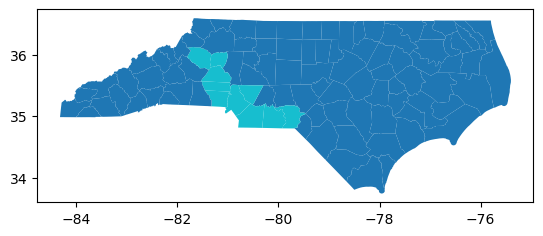

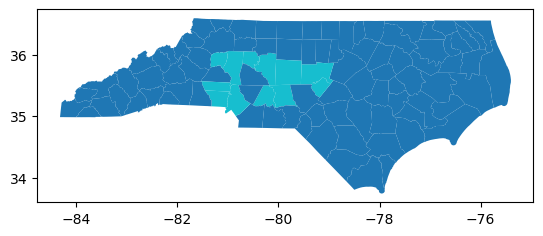

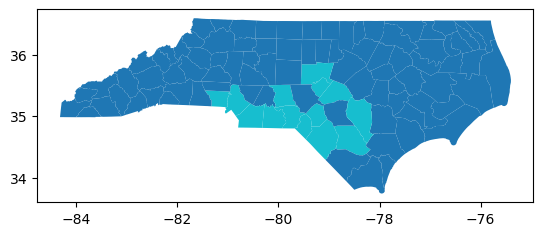

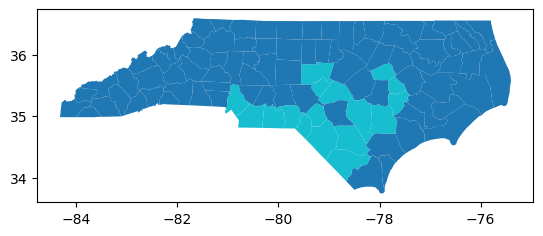

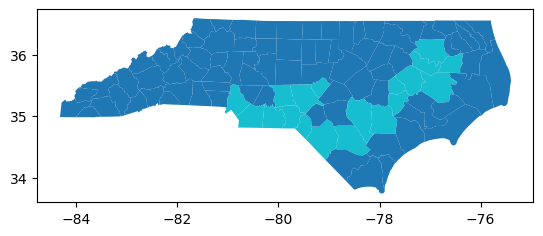

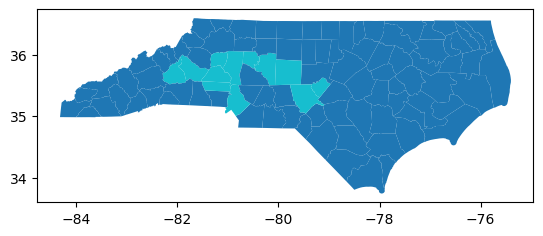

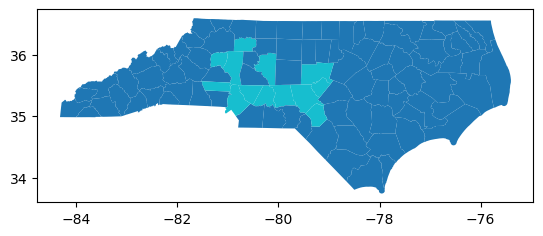

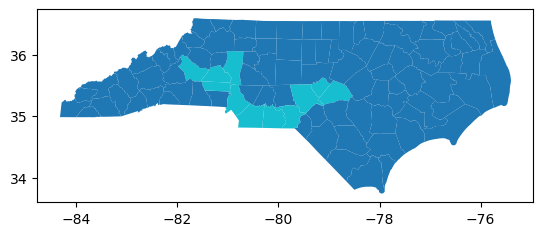

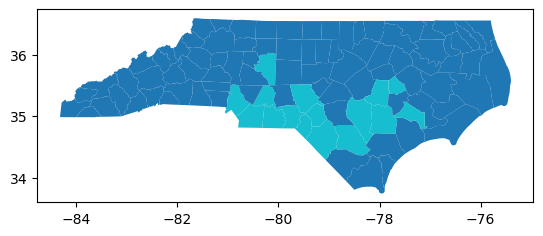

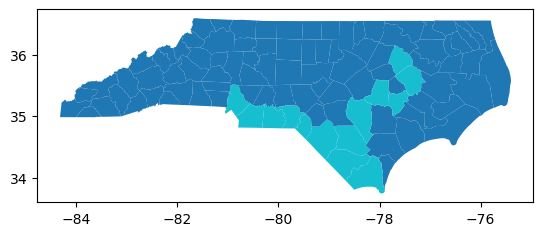

In [7]:
# Draw the districting plans
from draw import draw_single_district
filename = state + '_county.shp'

print("In no particular order, the top 10 clusters are:")
for district in districts:
    draw_single_district( filepath, filename, G, district, zoom=False )

In [8]:
print("clusters =",districts)

clusters = [[15, 20, 28, 32, 62, 63, 72, 74, 81, 99], [7, 12, 20, 23, 32, 37, 50, 57, 59, 62, 67, 81], [10, 11, 12, 13, 20, 28, 32, 50, 57, 61, 72, 73, 83, 99], [2, 3, 10, 11, 12, 13, 24, 28, 32, 56, 57, 61, 72, 73, 83, 94, 99], [3, 10, 12, 13, 22, 24, 26, 28, 32, 45, 50, 61, 69, 72, 83, 88, 94, 98, 99], [7, 12, 15, 32, 35, 37, 38, 59, 62, 67, 81, 88], [7, 12, 23, 32, 34, 50, 57, 59, 62, 73, 74, 81, 88], [7, 11, 12, 15, 28, 32, 35, 62, 72, 88, 99], [3, 10, 13, 23, 24, 28, 32, 36, 41, 59, 61, 72, 73, 83, 88, 99], [10, 13, 26, 28, 31, 32, 36, 49, 56, 61, 72, 83, 94, 99]]
